In [110]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel("Desktop/Data Scientist/Capstone1/Data/neis-data-dictionary_terms.xlsx")
main       = pd.read_excel("Desktop/Data Scientist/Capstone1/Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
main_df = main_df.replace(np.nan, 0, regex=True)
print(main_df.info())
print(main_df.head())
print(main_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53646 entries, 0 to 53645
Data columns (total 38 columns):
business_id           53646 non-null int64
start_date            53646 non-null datetime64[ns]
end_date              53646 non-null datetime64[ns]
neis_type             53646 non-null object
exit_reason           53646 non-null object
successful            53646 non-null object
anzsic_code           53646 non-null float64
industry_type         53646 non-null object
state                 53646 non-null object
metro                 53646 non-null int64
age_group             53646 non-null object
gender_cd             53646 non-null object
indigenous_ind        53646 non-null object
ex_offender_ind       53646 non-null object
nesb_ind              53646 non-null object
refugee_ind           53646 non-null object
disability_ind        53646 non-null object
homeless_ind          53646 non-null object
sole_parent_ind       53646 non-null object
neis_allowance_ind    53646 non-null obj

In [237]:
#Understanding involvement of communities in businesses and are their success rates

main_person = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter = main_person.query("PersVal == 'Y'")
#Replace the values with numbers to plot graphs
main_filter['PersVal'].replace(to_replace=dict(Y=1, N=0), inplace=True)
main_filter['successful'].replace(to_replace=dict(Y=1, N=0), inplace=True)
#print(main_filter.head(3))

#Set the index
main_filter.set_index = ['industry_type','successful','Personality']

# Aggregate on 'industry_type','Personality','successful' to get the count of people involved
####Data frame main_aggr will be used in various data visualisation to understand the correlation between the Personality
# of the business owner, Industry type, success rate etc.
main_aggr = main_filter.groupby(['industry_type','Personality','successful']).size().rename('count').reset_index()
print(main_aggr.head())
print(main_aggr.info())


# Replace N/A values with 0 in the columns of pivot table
main_pivot_df = main_filter.pivot_table(values=None, index=['industry_type','successful'], columns='Personality', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')

# Pivot table is displayed to understand the involvement of various personalities in various businesses and their success
# rate
print(main_pivot_df)

print(main_aggr.max())
###### Inference: On analysing the pivot Table, we find that:
#1) People with disabilities were involved in large numbers (than any other personality type) 
#in almost all of the industry types.
#
#2)  More people are involved in wholesale trade
#
#3)  Large proportions of business owners belong to personality type "Sole Parents"
#
#3)  Business owners with "disablitity" (indicator) are largely successful in "Personal and services" industry

/Users/srinivas/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


                     industry_type      Personality  successful  count
0  accommodation_cafes_restaurants   disability_ind           0     65
1  accommodation_cafes_restaurants   disability_ind           1    107
2  accommodation_cafes_restaurants  ex_offender_ind           0      5
3  accommodation_cafes_restaurants  ex_offender_ind           1      7
4  accommodation_cafes_restaurants     homeless_ind           0      9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
industry_type    227 non-null object
Personality      227 non-null object
successful       227 non-null int64
count            227 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.2+ KB
None
                                                  PersVal                  \
Personality                                disability_ind ex_offender_ind   
industry_type                   successful                                  
accommodation_cafes_restaurants 0     

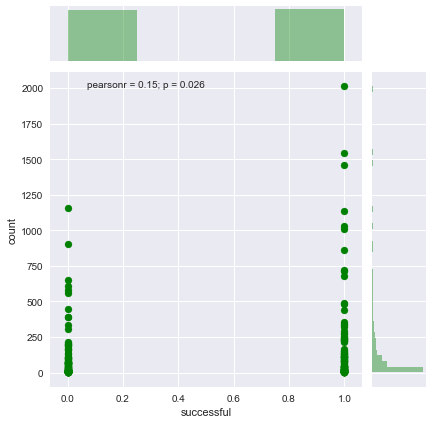

In [201]:
# Unable to plot columns with STR in x axis or y axis - Wanted to bring industry type in X axis to check the
# variation in count.
sns.jointplot(data=main_aggr,x='successful',y='count',kind='scatter',color='g') #kind=reg
plt.show()

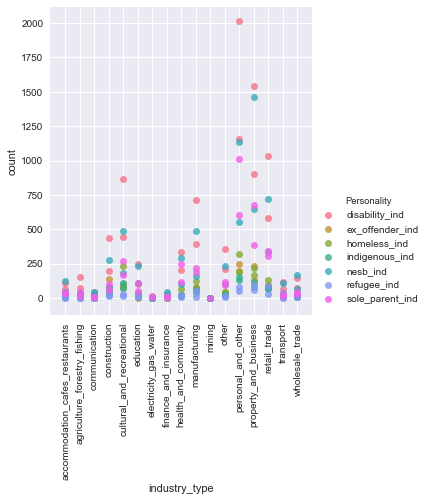

In [169]:
# Personalities involved in various industries
_ = sns.lmplot(data=main_aggr,x='industry_type',y='count',hue='Personality',fit_reg=False)
plt.xticks(rotation=90)
plt.show()

###### Inference: On analysing the scatter plot, we find that:
#1) Among the people with Atleast one of the Personality type (Indicator enabled), certain personalities types
# such as "disablity","Indigenous"(Aboriginal/Torres straight), "Sole Parents" are involved in businesses in larger
# numbers than any other personality types

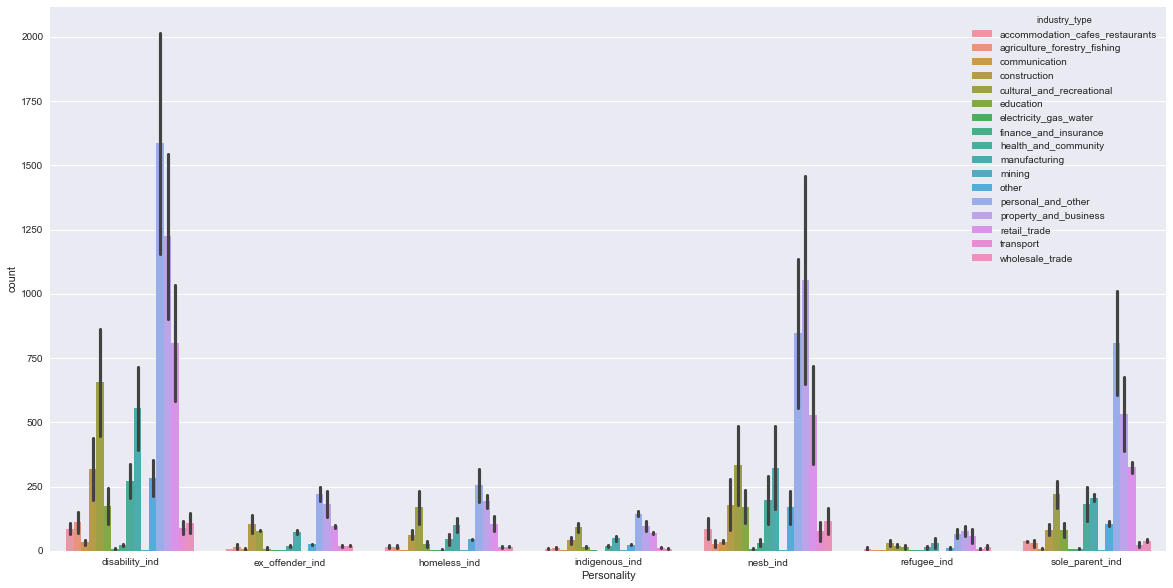

In [205]:
sns.set()
_ = sns.barplot(x='Personality',y='count',hue='industry_type',data=main_aggr)
plt.show()

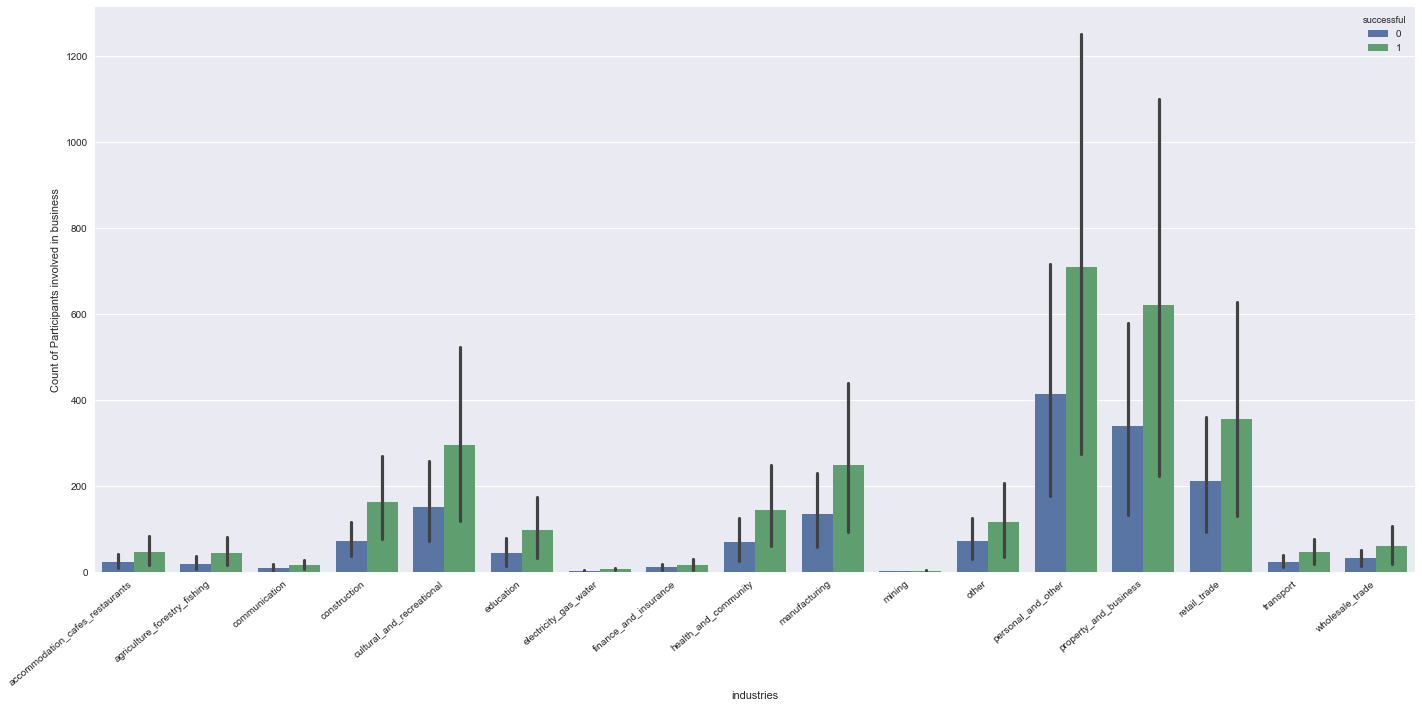

In [233]:
# Visualising the success/Failure ratio in various 'Industries'
sns.set()
_ = sns.barplot(x='industry_type',y='count', hue='successful',data=main_aggr) #main_aggr.reset_index()) ,hue='Personality'
_.set_xticklabels(_.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('industries')
plt.ylabel('Count of Participants involved in business')
plt.show()

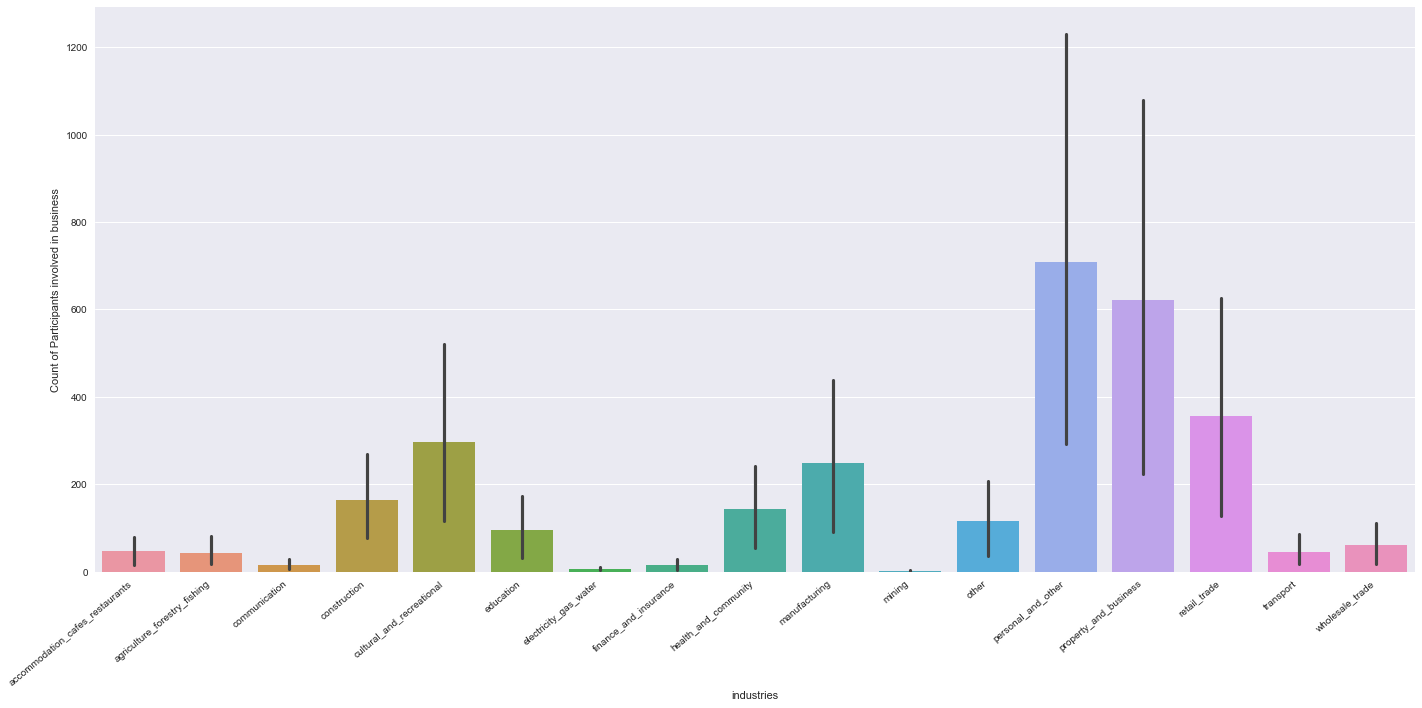

In [235]:
# Businesses that are highly successful among participants
# Only the successfull population is considered in this plot
main_success = main_aggr.query("successful == '1'")

sns.set()
_ = sns.barplot(x='industry_type',y='count', data=main_success) #main_aggr.reset_index()) ,hue='Personality'
_.set_xticklabels(_.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('industries')
plt.ylabel('Count of Participants involved in business')
plt.show()